## Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [2]:
df = pd.read_csv(r"C:\Users\kiran\Desktop\datatrained\Internship\Final Evaluation projets\Second-Phase-Evaluation-Projects--1-\Loan Application Status Prediction\loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### Columns

In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

### Target 

Loan_Status


### Analysing basic metrics

In [4]:
df.shape

(614, 13)

In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot: >

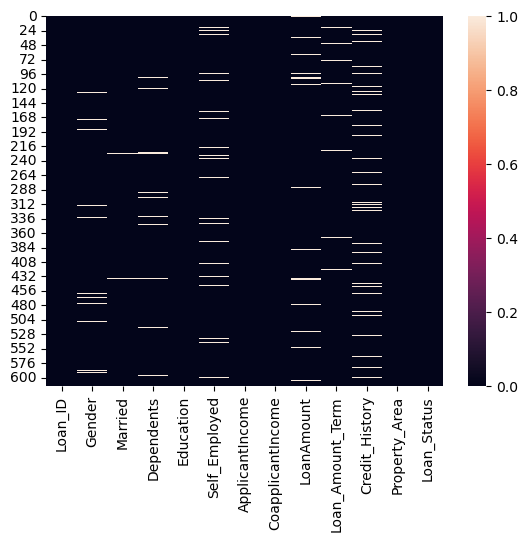

In [6]:
sns.heatmap(df.isna())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

#### Observations
- There are many null values which are needed to be treated and cannot be removd
- There are 5 Numerical columns and 8 Object Type Columns
- There are 8 Categorical columns

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Observations
- Distribution
    - Right skewed (mean > median)
        - ApplicantIncome
        - CoapplicantIncome
        - LoanAmount

    - LEFT skewed (mean < median)
        - Loan_Amount_Term
        - Credit_History

- Outliers can be observed in Applicant Income,Co applicant Income , and Loan Amount (There is huge difference between 25% and Min data, 75% and max  data)

In [10]:
num_col = []
obj_col = []
for i in df.columns:
    if df[i].dtype == object:
        obj_col.append(i)
    else:
        num_col.append(i)    

### Data Visualization

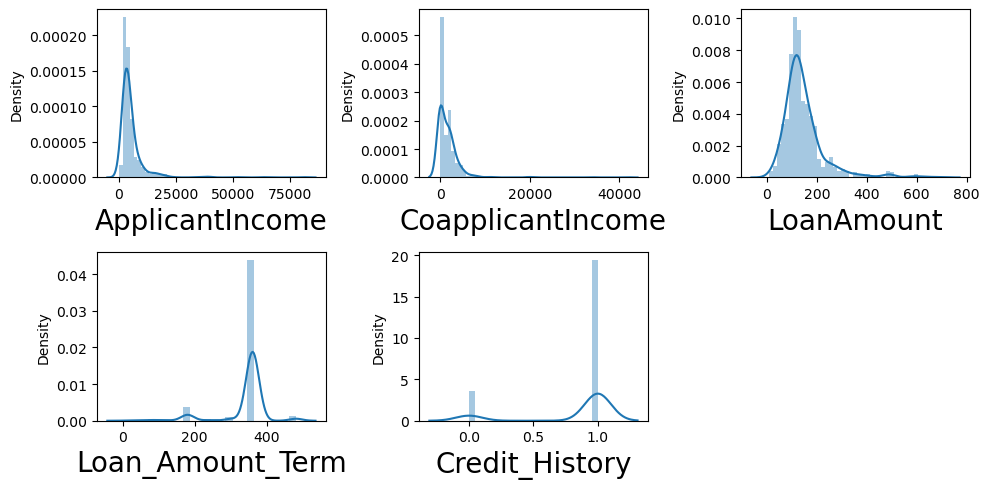

In [11]:
plt.figure(figsize=(10,5))
pn = 1
for column in num_col:
    
    sns.distplot(df[column],ax=plt.subplot(2,3,pn))
    plt.xlabel(column,fontsize = 20)
    pn +=1
    
plt.tight_layout()  

- From above visualization we can observe that ApplicantIncome,CoapplicantIncome And LoanAmount are right skewed and needed to be treated
- Eventhough Loan_Amount_Term and Credit_History seems to be left skewed, Since They are Categorical columns There Is no need to reduce Skeweness in Them


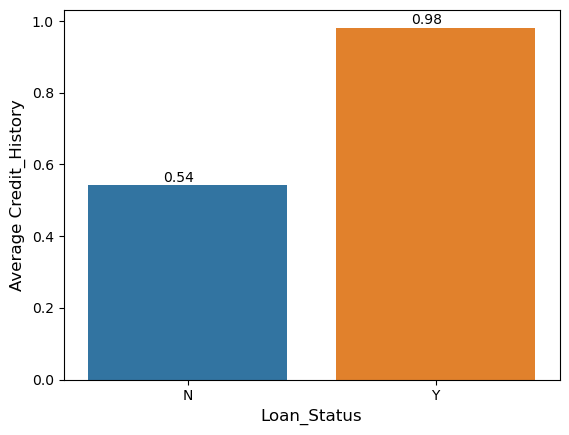

In [12]:
ls_group = df.groupby('Loan_Status')['Credit_History'].mean()
ax=sns.barplot(x=ls_group.index,y=ls_group.values)
for p in ax.patches:
   ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+0.01))
plt.xlabel('Loan_Status',fontsize = 12)
plt.ylabel('Average Credit_History',fontsize = 12)
plt.show()


- From Above Graph We can Say that Chances of Getting Loan is high If There is Past Credit History

<AxesSubplot: xlabel='LoanAmount', ylabel='Loan_Status'>

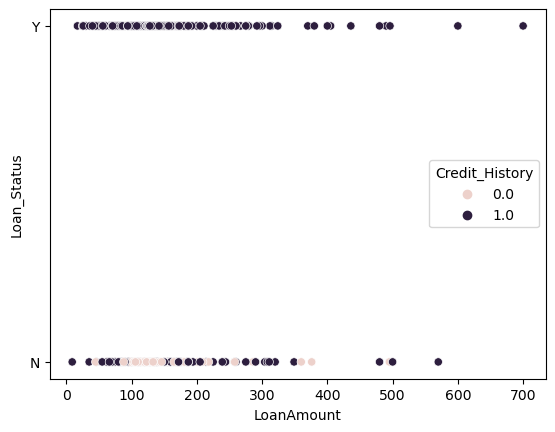

In [13]:
sns.scatterplot(data=df,x='LoanAmount',y='Loan_Status',hue = 'Credit_History' )

- From Above Graph We can Say that Chances of Getting Loan is high If There is Past Credit History And If Loan amount is High

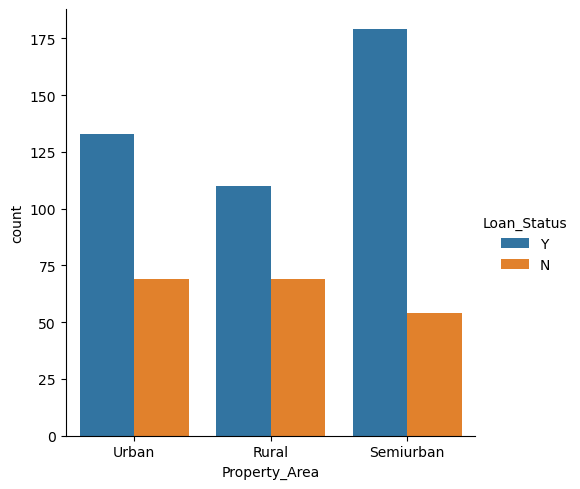

In [14]:
sns.catplot(data=df,hue='Loan_Status',x='Property_Area',kind='count')

- From Above Graph We can Say that There are more Number of Semiurban Area properties followed by Urban Area Properties
- Chances of Loan Approval Is high in Semi Urban Area As compared to other areas

<AxesSubplot: xlabel='ApplicantIncome', ylabel='LoanAmount'>

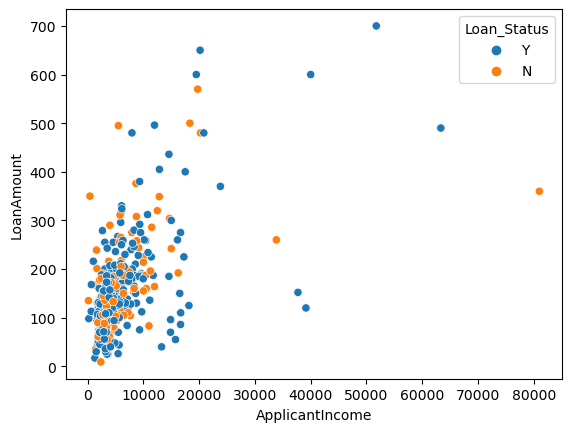

In [15]:
sns.scatterplot(data=df,x='ApplicantIncome',y='LoanAmount',hue = 'Loan_Status' )

There is a positive corelation Between Applicant Income and Loan Amount 

#### Missing Value Treatment

In [16]:
# Filling Object Data Type Columns with Mode values
for i in obj_col:
    if df[i].isna().sum() != 0:
        df[i] = df[i].fillna(df[i].mode()[0])

# Filling other values and Median
for i in df.columns:
    if df[i].isna().sum() != 0:
        df[i] = df[i].fillna(df[i].median())


### Encoading Categorical Data

In [17]:
from sklearn.preprocessing import LabelEncoder
lben= LabelEncoder()
for i in obj_col:
    df[i]= lben.fit_transform(df[i])
    label_mapping = dict(zip(lben.classes_, lben.transform(lben.classes_)))
    print("Label mapping:", label_mapping)

Label mapping: {'LP001002': 0, 'LP001003': 1, 'LP001005': 2, 'LP001006': 3, 'LP001008': 4, 'LP001011': 5, 'LP001013': 6, 'LP001014': 7, 'LP001018': 8, 'LP001020': 9, 'LP001024': 10, 'LP001027': 11, 'LP001028': 12, 'LP001029': 13, 'LP001030': 14, 'LP001032': 15, 'LP001034': 16, 'LP001036': 17, 'LP001038': 18, 'LP001041': 19, 'LP001043': 20, 'LP001046': 21, 'LP001047': 22, 'LP001050': 23, 'LP001052': 24, 'LP001066': 25, 'LP001068': 26, 'LP001073': 27, 'LP001086': 28, 'LP001087': 29, 'LP001091': 30, 'LP001095': 31, 'LP001097': 32, 'LP001098': 33, 'LP001100': 34, 'LP001106': 35, 'LP001109': 36, 'LP001112': 37, 'LP001114': 38, 'LP001116': 39, 'LP001119': 40, 'LP001120': 41, 'LP001123': 42, 'LP001131': 43, 'LP001136': 44, 'LP001137': 45, 'LP001138': 46, 'LP001144': 47, 'LP001146': 48, 'LP001151': 49, 'LP001155': 50, 'LP001157': 51, 'LP001164': 52, 'LP001179': 53, 'LP001186': 54, 'LP001194': 55, 'LP001195': 56, 'LP001197': 57, 'LP001198': 58, 'LP001199': 59, 'LP001205': 60, 'LP001206': 61, 'L

### Outliers

<AxesSubplot: ylabel='LoanAmount'>

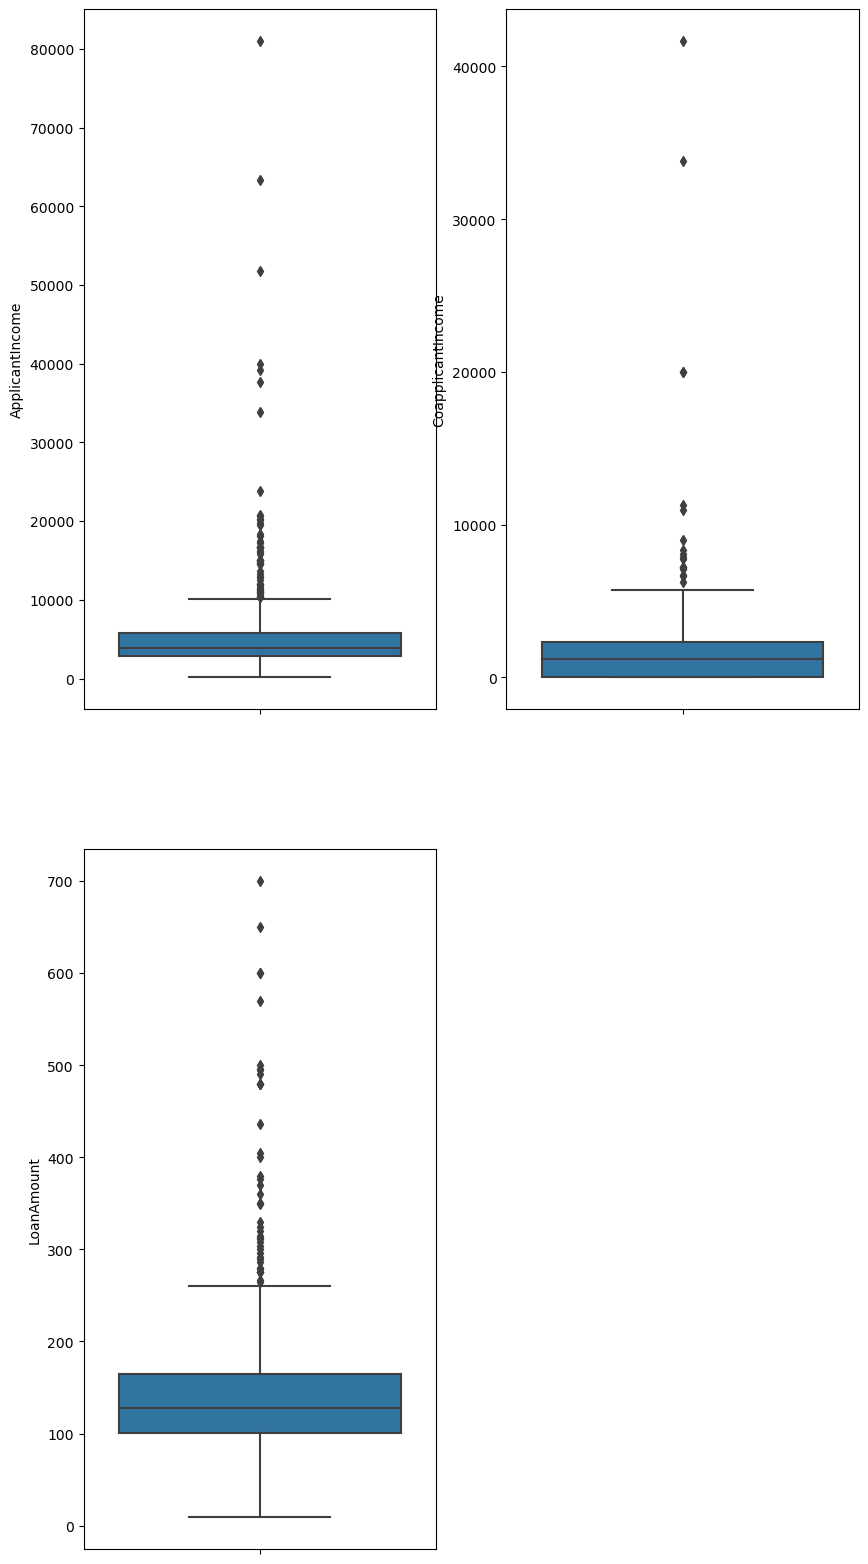

In [18]:
plt.figure(figsize=(10,20))
sns.boxplot(data=df,y='ApplicantIncome',ax=plt.subplot(2,2,1))
sns.boxplot(data=df,y='CoapplicantIncome',ax=plt.subplot(2,2,2))
sns.boxplot(data=df,y='LoanAmount',ax=plt.subplot(2,2,3))

- There are Many outliers which are needed to be removed
- we shell use z-score for Removing outliers

In [19]:
prev = df.shape

In [20]:
# finding outliers using z score
from scipy.stats import zscore
z = np.abs(zscore(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]))
z[z>3].count()

ApplicantIncome       8
CoapplicantIncome     6
LoanAmount           15
dtype: int64

In [21]:
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']][z<3]
df = df.dropna()
df.reset_index(drop=True,inplace=True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,609,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,0,1
585,610,1,1,3,0,0,4106.0,0.0,40.0,180.0,1.0,0,1
586,611,1,1,1,0,0,8072.0,240.0,253.0,360.0,1.0,2,1
587,612,1,1,2,0,0,7583.0,0.0,187.0,360.0,1.0,2,1


In [22]:
df.shape

(589, 13)

In [23]:
print('Data Loss % = ',np.round((prev[0]-df.shape[0])*100/prev[0],2),"%")

Data Loss % =  4.07 %


Since our data loss is only 4.07% we can continue

#### Corelation Analysis

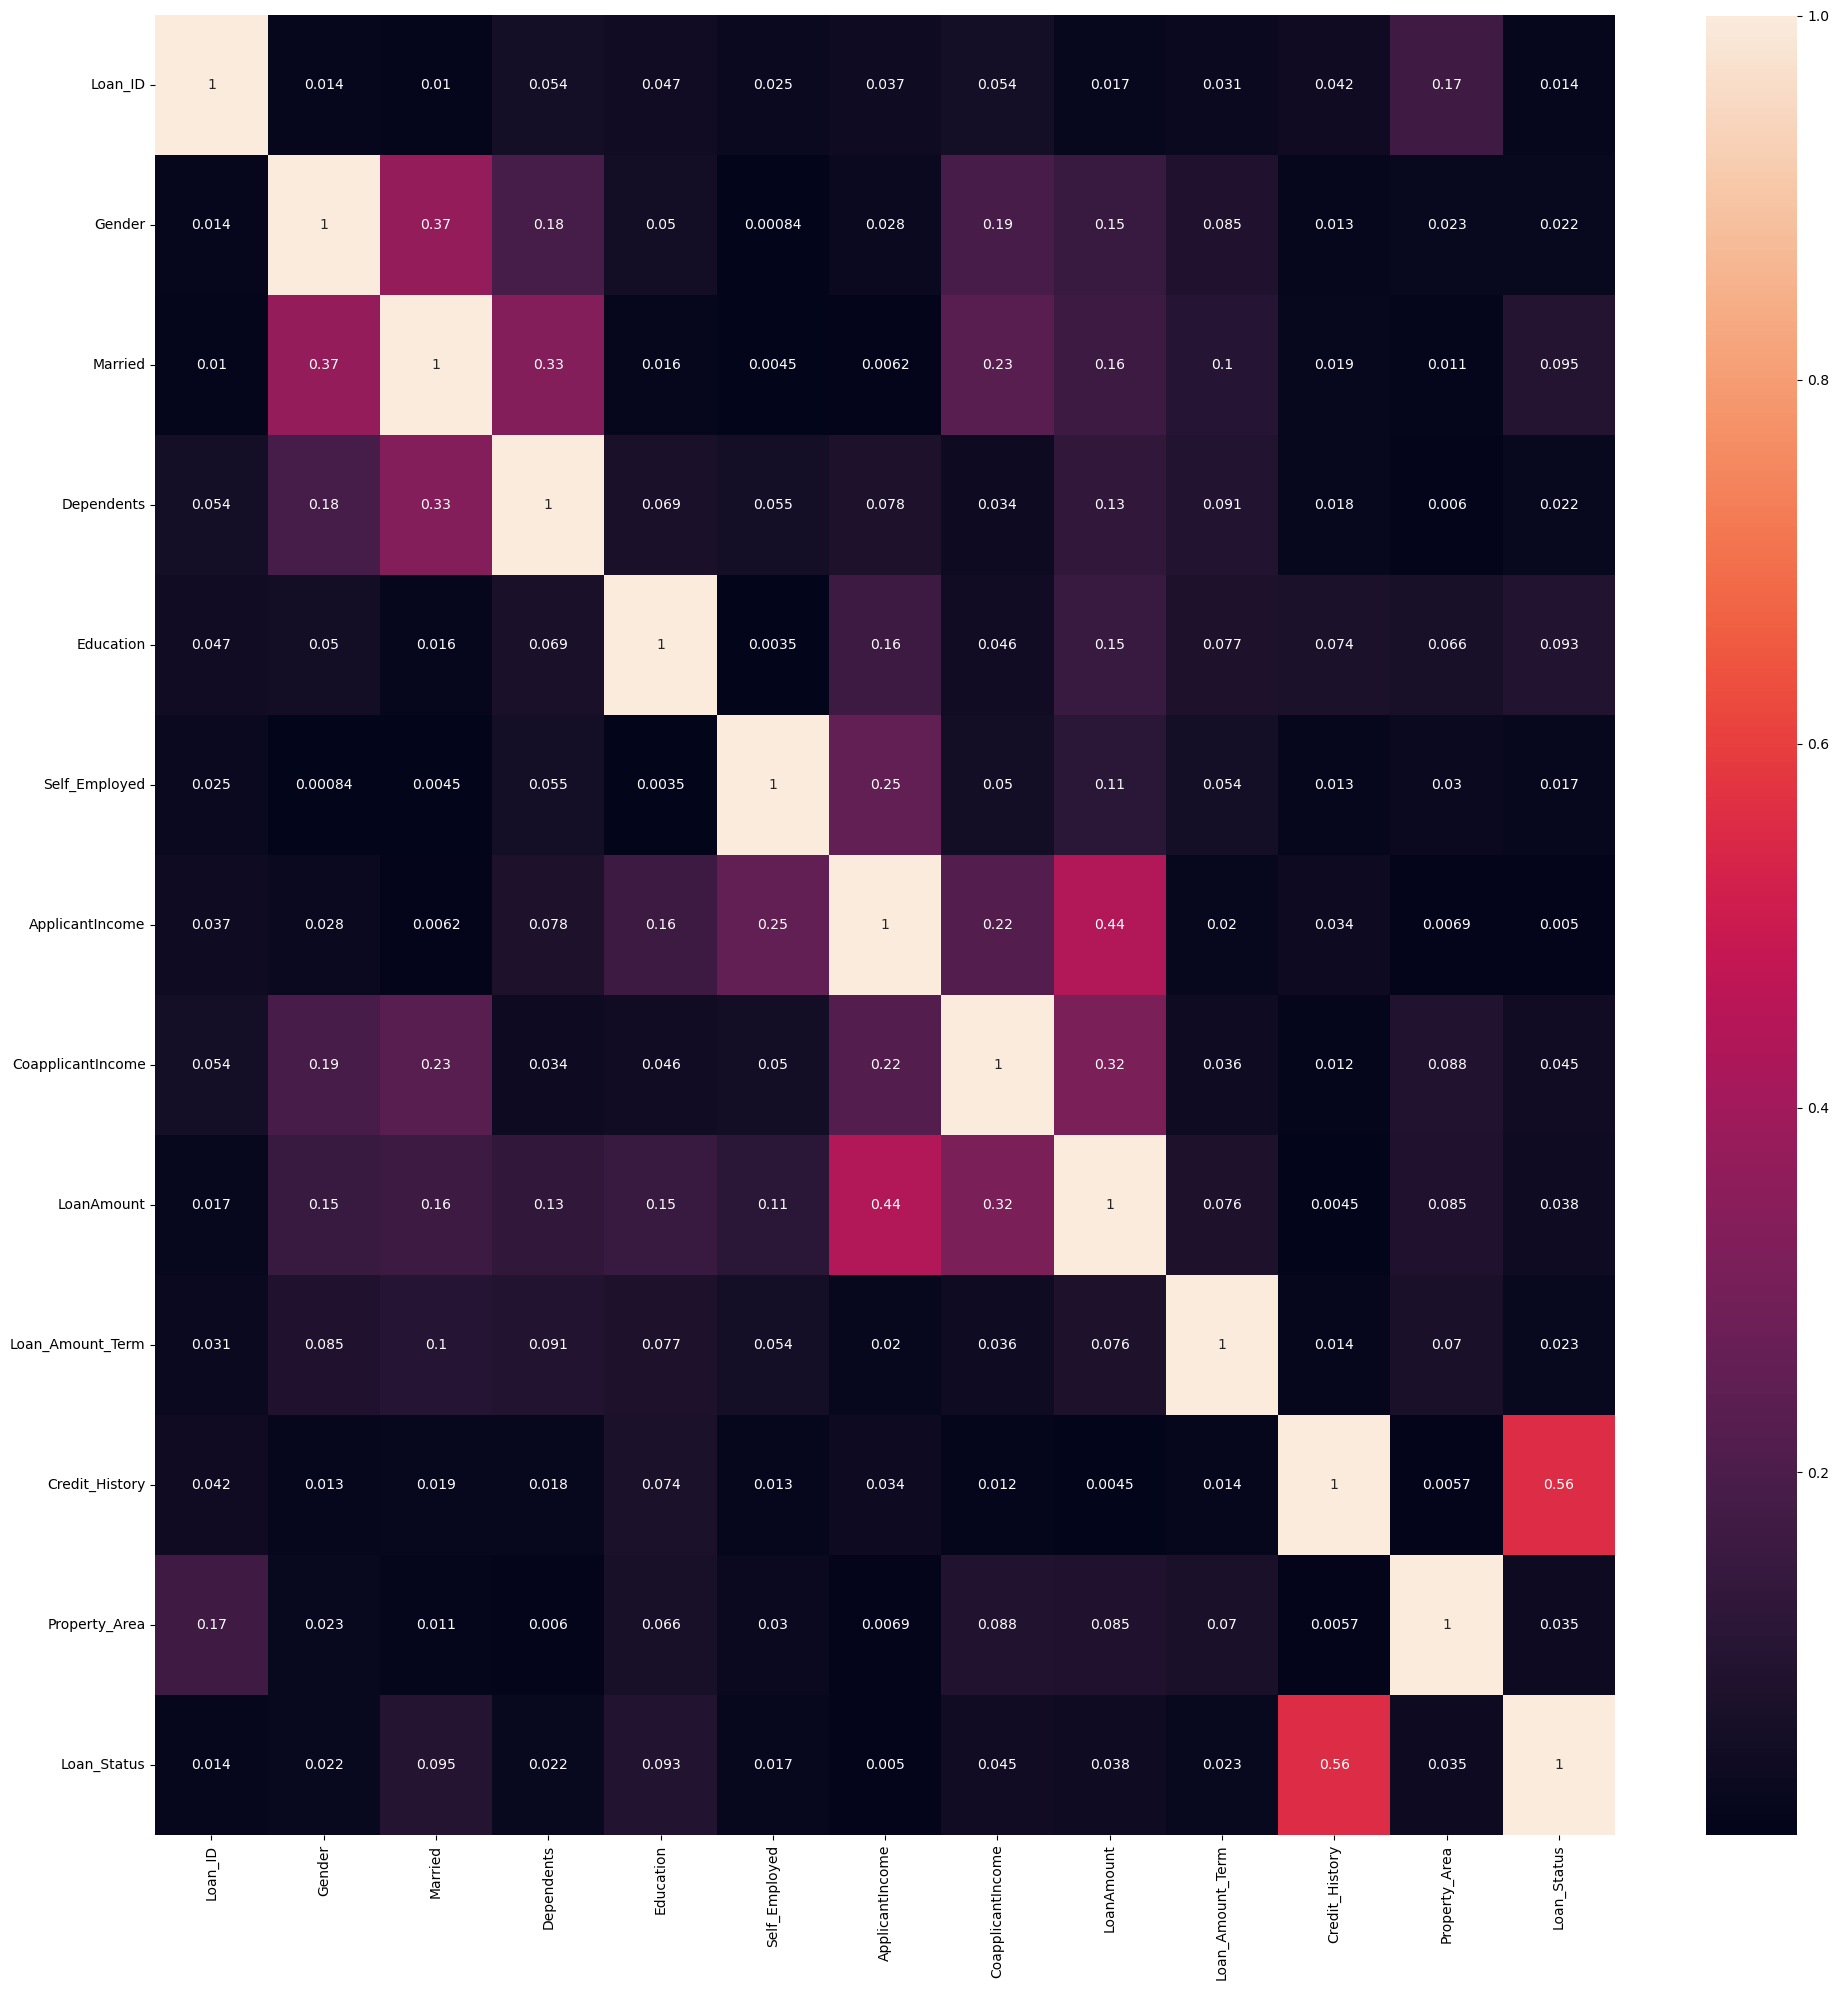

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr().abs(),annot=True,annot_kws={'size':10})
plt.tight_layout()

There is no Multicolinearity Observed

#### Treating Skewness

In [25]:
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].skew()

ApplicantIncome      2.164762
CoapplicantIncome    1.353191
LoanAmount           1.114173
dtype: float64

In [26]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = pt.fit_transform(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,11.194734,0.000000,14.367723,360.0,1.0,2,1
1,1,1,1,1,0,0,10.799314,9.745329,14.367723,360.0,1.0,0,0
2,2,1,1,0,0,1,10.125252,0.000000,10.570707,360.0,1.0,2,1
3,3,1,1,0,1,0,9.891032,10.530966,13.952783,360.0,1.0,2,1
4,4,1,0,0,0,0,11.236370,0.000000,15.009614,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,609,0,0,0,0,0,10.072021,0.000000,10.942350,360.0,1.0,0,1
585,610,1,1,3,0,0,10.622925,0.000000,8.293261,180.0,1.0,0,1
586,611,1,1,1,0,0,11.725394,6.781386,19.451041,360.0,1.0,2,1
587,612,1,1,2,0,0,11.621689,0.000000,17.028363,360.0,1.0,2,1


In [27]:
x = df.drop(columns='Loan_Status')
y=df['Loan_Status']

In [28]:
y.value_counts()

1    407
0    182
Name: Loan_Status, dtype: int64

### Resampling

In [29]:
# using smote
from imblearn.over_sampling import SMOTE
ov_sm = SMOTE(sampling_strategy=0.70) # increasing data upto 75% 
x,y = ov_sm.fit_resample(x,y)
y.value_counts()

1    407
0    284
Name: Loan_Status, dtype: int64

#### Standerd scaler

In [30]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.715307,0.510832,-1.252507,-0.710082,-0.510832,-0.361847,0.712109,-1.110604,0.010886,0.269736,0.498935,1.298366
1,-1.709686,0.510832,0.798399,0.325080,-0.510832,-0.361847,0.247675,0.791442,0.010886,0.269736,0.498935,-1.261323
2,-1.704065,0.510832,0.798399,-0.710082,-0.510832,2.763603,-0.544033,-1.110604,-1.402577,0.269736,0.498935,1.298366
3,-1.698444,0.510832,0.798399,-0.710082,1.957592,-0.361847,-0.819133,0.944779,-0.143578,0.269736,0.498935,1.298366
4,-1.692824,0.510832,-1.252507,-0.710082,-0.510832,-0.361847,0.761013,-1.110604,0.249834,0.269736,0.498935,1.298366
...,...,...,...,...,...,...,...,...,...,...,...,...
686,1.494252,0.510832,0.798399,2.395404,-0.510832,-0.361847,0.537347,-0.505378,0.263922,0.269736,-0.288177,-1.261323
687,-0.827198,0.510832,0.798399,0.325080,-0.510832,-0.361847,-0.682973,0.095359,-0.179478,0.269736,-1.263662,-1.261323
688,-0.394385,0.510832,0.798399,-0.710082,-0.510832,-0.361847,0.654879,-1.110604,1.819184,0.269736,0.498935,1.298366
689,0.291370,0.510832,0.798399,-0.710082,-0.510832,-0.361847,-0.407205,0.268611,-0.793719,1.597434,-1.424538,1.298366


### Train test Split

In [31]:
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [32]:
# creating df for storing acuracy  score
tts_df = pd.DataFrame(data=None,columns=['Random state','Train accuracy','Test accuracy'])

In [33]:
# finding best random state
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    log_reg.fit(x_train,y_train)
    pred_train = log_reg.predict(x_train)
    pred_test = log_reg.predict(x_test)
    train_acc = accuracy_score(y_train,pred_train)
    test_acc = accuracy_score(y_test,pred_test)
    if round(train_acc*100,0) == round(test_acc*100,0):
        tts_df =tts_df.append({'Random state':i,'Train accuracy':train_acc*100,'Test accuracy':test_acc*100},ignore_index=True)

    
tts_df.sort_values('Train accuracy',ascending=False)  

    
    

,Random state,Train accuracy,Test accuracy
35,392.0,79.343629,79.190751
41,443.0,79.343629,78.612717
56,725.0,79.343629,79.190751
0,4.0,79.150579,79.190751
51,614.0,79.150579,78.612717
...,...,...,...
61,788.0,77.606178,78.034682
70,871.0,77.606178,78.034682
78,967.0,77.413127,76.878613
73,919.0,77.220077,77.456647


- we can observe that Random state 939 we get max accuracy wit minimum difference

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=455)

### Training the model

In [35]:
# Defining training model
def mod_train (model,x_tr,x_te,y_tr,y_te):
    model.fit(x_tr,y_tr)
    return accuracy_score(y_te,model.predict(x_te))


Logistic regression 

In [36]:
lr = LogisticRegression()
lr_ac_score = mod_train(lr,x_train,x_test,y_train,y_test)
# Find best cv
from sklearn.model_selection import cross_val_score
for i in range(4,10):
    lr_cv_score=cross_val_score(lr,x_scaled,y,cv=i).mean()
    print('\ncv = ',i,'\nCross Validation score = ',lr_cv_score*100,'\nAccuracy score',lr_ac_score*100,end = '\n\n')
    


cv =  4 
Cross Validation score =  73.21716628579111 
Accuracy score 78.61271676300578


cv =  5 
Cross Validation score =  75.25284120529663 
Accuracy score 78.61271676300578


cv =  6 
Cross Validation score =  75.6871564217891 
Accuracy score 78.61271676300578


cv =  7 
Cross Validation score =  77.2874517772477 
Accuracy score 78.61271676300578


cv =  8 
Cross Validation score =  77.15517241379311 
Accuracy score 78.61271676300578


cv =  9 
Cross Validation score =  76.7107161844004 
Accuracy score 78.61271676300578



- cv = 7 is giving best result

In [37]:
cv = 7

In [38]:
# creating df for storing cv score and acc score
ms_df = pd.DataFrame(data=None,columns=['Model','CV score','Test accuracy','Difference'])

In [39]:
lr_s_cv_score=cross_val_score(lr,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',lr_s_cv_score*100,'\nAccuracy score = ',lr_ac_score*100,'\nDifference = ',lr_ac_score*100-(lr_s_cv_score*100))
ms_df = ms_df.append({'Model':'Logistic regression','CV score':round(lr_s_cv_score*100,2),'Test accuracy':round(lr_ac_score*100,2),'Difference':round(np.abs(lr_ac_score*100-(lr_s_cv_score*100)),2)},ignore_index=True)


Cross Validation score =  77.2874517772477 
Accuracy score =  78.61271676300578 
Difference =  1.325264985758082


##### Random  forest classifer

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_ac_score = mod_train(rfc,x_train,x_test,y_train,y_test)

# cross validation
rfc_s_cv_score_mean=cross_val_score(rfc,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',rfc_s_cv_score_mean*100,'\nAccuracy score = ',rfc_ac_score*100,'\nDifference = ',np.abs(rfc_ac_score*100-(rfc_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'Random forest classifier','CV score':round(rfc_s_cv_score_mean*100,2),'Test accuracy':round(rfc_ac_score*100,2),'Difference':round(np.abs(rfc_ac_score*100-(rfc_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  60.04652943428454 
Accuracy score =  78.03468208092485 
Difference =  17.988152646640316


##### AdaBoostClassifier

In [41]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc_ac_score = mod_train(abc,x_train,x_test,y_train,y_test)

# cross validation
abc_s_cv_score_mean=cross_val_score(abc,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',abc_s_cv_score_mean*100,'\nAccuracy score = ',abc_ac_score*100,'\nDifference = ',np.abs(abc_ac_score*100-(abc_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'AdaBoost Classifier','CV score':round(abc_s_cv_score_mean*100,2),'Test accuracy':round(abc_ac_score*100,2),'Difference':round(np.abs(abc_ac_score*100-(abc_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  45.70780693229672 
Accuracy score =  77.45664739884393 
Difference =  31.748840466547207


##### GradientBoostingClassifier

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc_ac_score = mod_train(gbc,x_train,x_test,y_train,y_test)

# cross validation
gbc_s_cv_score_mean=cross_val_score(gbc,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',gbc_s_cv_score_mean*100,'\nAccuracy score = ',gbc_ac_score*100,'\nDifference = ',np.abs(gbc_ac_score*100-(gbc_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'Gradient Boosting Classifier','CV score':round(gbc_s_cv_score_mean*100,2),'Test accuracy':round(gbc_ac_score*100,2),'Difference':round(np.abs(gbc_ac_score*100-(gbc_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  41.07695026062373 
Accuracy score =  80.34682080924856 
Difference =  39.26987054862482


##### XGBClassifier

In [43]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_ac_score = mod_train(xgb,x_train,x_test,y_train,y_test)

# cross validation
xgb_s_cv_score_mean=cross_val_score(xgb,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',xgb_s_cv_score_mean*100,'\nAccuracy score = ',xgb_ac_score*100,'\nDifference = ',np.abs(xgb_ac_score*100-(xgb_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'XGBoost Classifier','CV score':round(xgb_s_cv_score_mean*100,2),'Test accuracy':round(xgb_ac_score*100,2),'Difference':round(np.abs(xgb_ac_score*100-(xgb_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  45.99640722089702 
Accuracy score =  80.34682080924856 
Difference =  34.350413588351536


##### SVC

In [44]:
from sklearn.svm import SVC
svc = SVC()
svc_ac_score = mod_train(svc,x_train,x_test,y_train,y_test)

# cross validation
svc_s_cv_score_mean=cross_val_score(svc,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',svc_s_cv_score_mean*100,'\nAccuracy score = ',svc_ac_score*100,'\nDifference = ',np.abs(svc_ac_score*100-(svc_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'SVC','CV score':round(svc_s_cv_score_mean*100,2),'Test accuracy':round(svc_ac_score*100,2),'Difference':round(np.abs(svc_ac_score*100-(svc_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  77.14609653385163 
Accuracy score =  78.03468208092485 
Difference =  0.8885855470732196


##### KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_ac_score = mod_train(knn,x_train,x_test,y_train,y_test)

# cross validation
knn_s_cv_score_mean=cross_val_score(knn,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',knn_s_cv_score_mean*100,'\nAccuracy score = ',knn_ac_score*100,'\nDifference = ',np.abs(knn_ac_score*100-(knn_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'KNN Classifier','CV score':round(knn_s_cv_score_mean*100,2),'Test accuracy':round(knn_ac_score*100,2),'Difference':round(np.abs(knn_ac_score*100-(knn_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  73.80952380952381 
Accuracy score =  78.03468208092485 
Difference =  4.2251582714010425


In [46]:
ms_df.sort_values('Test accuracy',ascending=False)

,Model,CV score,Test accuracy,Difference
3,Gradient Boosting Classifier,41.08,80.35,39.27
4,XGBoost Classifier,46.00,80.35,34.35
0,Logistic regression,77.29,78.61,1.33
1,Random forest classifier,60.05,78.03,17.99
5,SVC,77.15,78.03,0.89
6,KNN Classifier,73.81,78.03,4.23
2,AdaBoost Classifier,45.71,77.46,31.75


- we can observe that Logistic regression is giving good accuracy with less over fitting

### Hyperparameter Tuning

In [47]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [48]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],          # Regularization type (L1 or L2)
    'C': [ 0.01, 0.1, 1, 10],   # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],  # Optimization algorithm
    'max_iter': [100, 125],      # Maximum number of iterations
    'fit_intercept': [True, False],   # Whether to fit an intercept term
    'class_weight': [None, 'balanced'],  # Weight to apply to classes (imbalanced datasets)
    'random_state': [42],             # Random seed for reproducibility
    'tol': [1e-3, 1e-4, 1e-5]         # Tolerance for stopping criterion
}

In [50]:
# using grid search cv
gcv = GridSearchCV(estimator=LogisticRegression(),param_grid=param_grid,cv=7,scoring='accuracy')
gcv.fit(x_train,y_train)

# Print the best parameters and score
print("Best parameters:", gcv.best_params_)
print("Best score:", gcv.best_score_)

Best parameters: {'C': 0.1, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1', 'random_state': 42, 'solver': 'saga', 'tol': 0.001}
Best score: 0.7837837837837839


# Training with best parms

In [51]:
final_model = LogisticRegression(penalty='l1',C=0.1,max_iter=100,solver= 'saga',class_weight='balanced',fit_intercept=True,tol=0.001,random_state = 42)
final_model.fit(x_train,y_train)
final_model_test_pred=final_model.predict(x_test)
final_model_ac_score = accuracy_score(y_test,final_model_test_pred)*100
print (final_model_ac_score)

79.1907514450867


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,final_model_test_pred))


              precision    recall  f1-score   support

           0       0.89      0.51      0.65        65
           1       0.76      0.96      0.85       108

    accuracy                           0.79       173
   macro avg       0.83      0.74      0.75       173
weighted avg       0.81      0.79      0.78       173



#### roc curve

In [53]:
fpr,tpr,threshold = roc_curve(y_test,final_model_test_pred)

In [54]:
print("fpr = ",fpr,'\ntpr = ',tpr,'\nthreshold = ',threshold)

fpr =  [0.         0.49230769 1.        ] 
tpr =  [0.         0.96296296 1.        ] 
threshold =  [2 1 0]


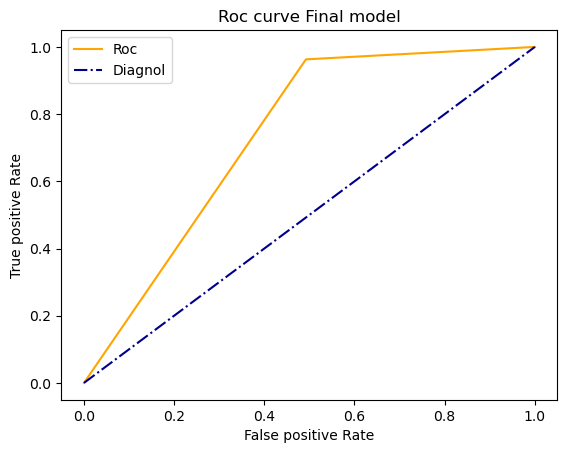

In [55]:
plt.plot(fpr,tpr,color='orange',label = 'Roc') # x axis , y axis ,clr, lable
plt.plot([0,1],[0,1],color='darkblue',linestyle='-.',label = "Diagnol")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title('Roc curve Final model')
plt.legend()
plt.show()

In [56]:
import pickle
with open('final_xgb_classifier_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

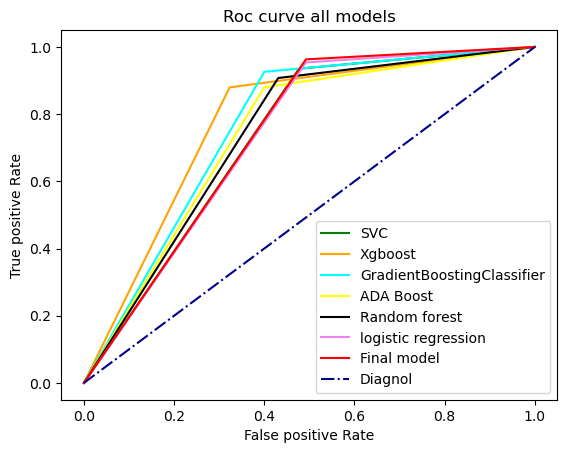

In [57]:
fpr1,tpr1,threshold = roc_curve(y_test,final_model_test_pred)
fpr2,tpr2,threshold = roc_curve(y_test,svc.predict(x_test))
fpr3,tpr3,threshold = roc_curve(y_test,xgb.predict(x_test))
fpr4,tpr4,threshold = roc_curve(y_test,gbc.predict(x_test))
fpr5,tpr5,threshold = roc_curve(y_test,abc.predict(x_test))
fpr6,tpr6,threshold = roc_curve(y_test,rfc.predict(x_test))
fpr7,tpr7,threshold = roc_curve(y_test,lr.predict(x_test))



plt.plot(fpr2,tpr2,color='green',label = 'SVC') # x axis , y axis ,clr, lable
plt.plot(fpr3,tpr3,color='orange',label = 'Xgboost')
plt.plot(fpr4,tpr4,color='cyan',label = 'GradientBoostingClassifier') 
plt.plot(fpr5,tpr5,color='yellow',label = 'ADA Boost') 
plt.plot(fpr6,tpr6,color='black',label = 'Random forest') 
plt.plot(fpr7,tpr7,color='violet',label = 'logistic regression') 
plt.plot(fpr1,tpr1,color='red',label = 'Final model')
plt.plot([0,1],[0,1],color='darkblue',linestyle='-.',label = "Diagnol")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title('Roc curve all models')
plt.legend()
plt.show()

### Saving Model

In [58]:
import pickle
with open('final_LR_classifier_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

### Conclusion

- Our Final Model Predicts Loan_Status with 81% Test Accuracy
- EVenthough other Models are giving Higher accuracy They are Over-Fitting, ThereFore Our Model Is Best Model